#### **Section 2.2.5 Logarithmic Transformation**

**Logarithmic Transformation:**

The logarithmic transformation, represented as $y = \log(x)$, is a fundamental mathematical operation commonly applied in regression analysis. 

Logarithmic transformations play a crucial role in addressing heteroscedasticity within our dataset. By stabilising the variance of residuals, the transformed data conforms more closely to the assumptions of linear regression, thereby enhancing the reliability of our modelling results.

This targeted approach to logarithmic transformation serves as a strategic solution to rectify heteroscedasticity observed in our residual plot. By carefully selecting the appropriate variable and applying this transformation, our goal is to refine the linearity of the relationship between the predictor and response variables. This alignment with linear regression assumptions is pivotal for achieving more robust and dependable modelling outcomes.

In [10]:
import numpy as np

# Apply logarithmic transformation to 'Storks' and 'BirthRate'
df['Storks_log'] = np.log(df['Storks'])
df['BirthRate_log'] = np.log(df['BirthRate'])

# Check the transformed data
print(df[['Storks', 'Storks_log', 'BirthRate', 'BirthRate_log']].head())


          Storks  Storks_log  BirthRate  BirthRate_log
Country                                               
Albania      100    4.605170         83       4.418841
Austria      300    5.703782         87       4.465908
Belgium        1    0.000000        118       4.770685
Bulgaria    5000    8.517193        117       4.762174
Denmark        9    2.197225         59       4.077537


**Explanation:**

1. **Import NumPy:**
    - `import numpy as np`: This line imports the NumPy library and gives it the alias 'np' for convenience. NumPy is used for mathematical operations, and in this case, it provides the `log` function for logarithmic transformations.

2. **Apply Logarithmic Transformation:**
    - `df['Storks_log'] = np.log(df['Storks'])`: This line creates a new column 'Storks_log' in the DataFrame 'df' and assigns the natural logarithm (base e) of the 'Storks' column to it. This represents the logarithmic transformation of the 'Storks' variable.

    - `df['BirthRate_log'] = np.log(df['BirthRate'])`: Similarly, this line creates a new column 'BirthRate_log' and assigns the natural logarithm of the 'BirthRate' column to it, representing the logarithmic transformation of the 'BirthRate' variable.

3. **Check the Transformed Data:**
    - `print(df[['Storks', 'Storks_log', 'BirthRate', 'BirthRate_log']].head())`: This line prints the first few rows of the DataFrame, specifically the columns related to both the original and logarithmically transformed 'Storks' and 'BirthRate' variables. This allows you to inspect how the transformation has affected the data visually.

In [11]:
import statsmodels.api as sm

# Fit linear regression model with the transformed variable
model_log = sm.OLS(df['BirthRate_log'], sm.add_constant(df['Storks_log'])).fit()

# Print the summary
print(model_log.summary())

# Predicted values after logarithmic transformation
predicted_values_log = model_log.predict(sm.add_constant(df['Storks_log']))

# Residuals after logarithmic transformation
residuals_log = df['BirthRate_log'] - predicted_values_log

# Mean Squared Error (MSE) after logarithmic transformation
mse_log = np.mean(residuals_log**2)

# Root Mean Squared Error (RMSE) after logarithmic transformation
rmse_log = np.sqrt(mse_log)

print(f"\nRoot Mean Squared Error (RMSE) after Logarithmic Transformation: {rmse_log:.4f}")


                            OLS Regression Results                            
Dep. Variable:          BirthRate_log   R-squared:                       0.149
Model:                            OLS   Adj. R-squared:                  0.092
Method:                 Least Squares   F-statistic:                     2.616
Date:                Wed, 22 Nov 2023   Prob (F-statistic):              0.127
Time:                        15:11:13   Log-Likelihood:                -22.565
No. Observations:                  17   AIC:                             49.13
Df Residuals:                      15   BIC:                             50.80
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.6691      0.514      9.080      0.0

**Explanation:**

1. **Import Statsmodels:**
    - `import statsmodels.api as sm`: This line imports the Statsmodels library, specifically the 'api' module, and gives it the alias 'sm' for convenience. Statsmodels is used for statistical modelling and provides functions for various regression analyses.

2. **Fit Linear Regression Model:**
    - `model_log = sm.OLS(df['BirthRate_log'], sm.add_constant(df['Storks_log'])).fit()`: This line fits a linear regression model using Ordinary Least Squares (OLS) to the transformed variables. The dependent variable is 'BirthRate_log', and the independent variable is 'Storks_log'. The `sm.add_constant` function adds a constant term to the independent variable, allowing the model to estimate the intercept and slope.

3. **Print the Summary:**
    - `print(model_log.summary())`: This line prints a summary of the fitted regression model. The summary includes statistical metrics and information about the model's performance, such as coefficients, R-squared values, and statistical tests.

4. **Predicted Values and Residuals:**
    - `predicted_values_log = model_log.predict(sm.add_constant(df['Storks_log']))`: This line calculates the predicted values of the dependent variable ('BirthRate_log') based on the fitted linear regression model.
    - `residuals_log = df['BirthRate_log'] - predicted_values_log`: This line computes the residuals by subtracting the predicted values from the actual values. Residuals represent the differences between the observed and predicted values.

5. **Mean Squared Error (MSE) Calculation:**
    - `mse_log = np.mean(residuals_log**2)`: This line calculates the Mean Squared Error (MSE) after the logarithmic transformation. MSE is the average of the squared residuals and provides a measure of the average squared deviation between predicted and actual values.

6. **Root Mean Squared Error (RMSE) Calculation:**
    - `rmse_log = np.sqrt(mse_log)`: This line computes the Root Mean Squared Error (RMSE) by taking the square root of the MSE. RMSE is a measure of the average magnitude of the residuals and is often used to assess the goodness of fit of a regression model. It is particularly useful when the dependent variable has been transformed, as in this case with the logarithmic transformation.

7. **Print RMSE after Logarithmic Transformation:**
    - `print(f"\nRoot Mean Squared Error (RMSE) after Logarithmic Transformation: {rmse_log:.4f}")`: This line prints the calculated RMSE after the logarithmic transformation. The RMSE value gives an indication of how well the linear regression model, applied to the logarithmically transformed data, predicts the dependent variable.


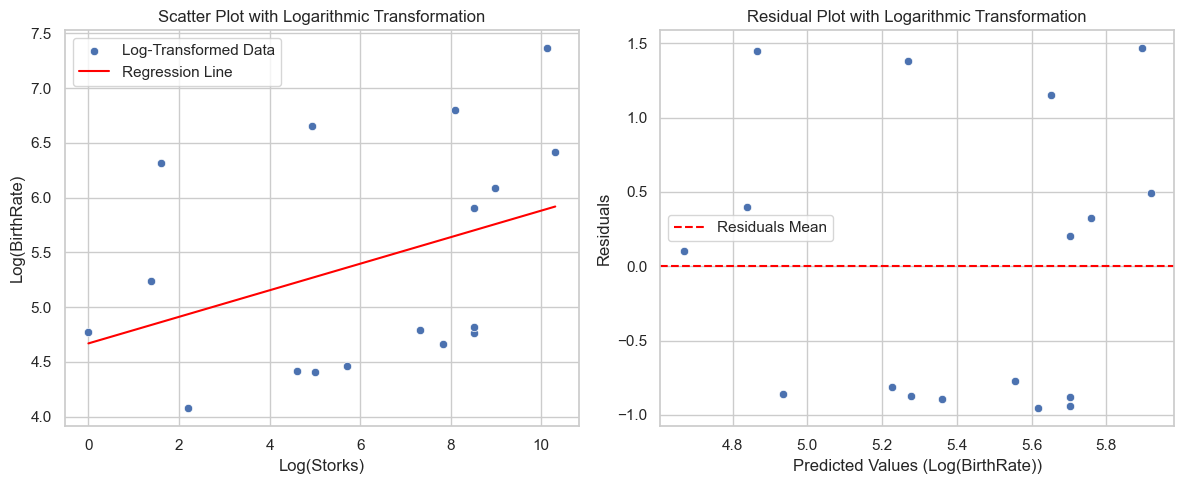

Equation of the Regression Line: BirthRate = 4.6691 + 0.1212 * Storks


In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter plot with logarithmic transformation
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.scatterplot(x=df['Storks_log'], y=df['BirthRate_log'], label='Log-Transformed Data')
plt.xlabel('Log(Storks)')
plt.ylabel('Log(BirthRate)')
plt.title('Scatter Plot with Logarithmic Transformation')

# Regression line
sns.lineplot(x=df['Storks_log'], y=model_log.predict(sm.add_constant(df['Storks_log'])), color='red', label='Regression Line')
plt.legend()

# Residual plot
plt.subplot(1, 2, 2)
sns.scatterplot(x=model_log.predict(sm.add_constant(df['Storks_log'])), y=model_log.resid)
plt.axhline(y=0, color='red', linestyle='--', label='Residuals Mean')
plt.xlabel('Predicted Values (Log(BirthRate))')
plt.ylabel('Residuals')
plt.title('Residual Plot with Logarithmic Transformation')
plt.legend()

plt.tight_layout()
plt.show()

# Extract coefficients from the model
intercept = model_log.params['const']
slope = model_log.params['Storks_log']

# Print the equation
print(f"Equation of the Regression Line: BirthRate = {intercept:.4f} + {slope:.4f} * Storks")


**Explanation:**

**Scatter Plot with Logarithmic Transformation (Subplot 1):**

- `sns.scatterplot(x=df['Storks_log'], y=df['BirthRate_log'], label='Log-Transformed Data')`: Creates a scatter plot using the logarithmically transformed data. The x-axis represents the logarithm of storks, and the y-axis represents the logarithm of birth rates.

- `sns.lineplot(x=df['Storks_log'], y=model_log.predict(sm.add_constant(df['Storks_log'])), colour='red', label='Regression Line')`: Adds a red regression line to the scatter plot, representing the linear relationship between the logarithm of storks and the logarithm of birth rates predicted by the model.

**Residual Plot (Subplot 2):**

- `sns.scatterplot(x=model_log.predict(sm.add_constant(df['Storks_log'])), y=model_log.resid)`: Creates a residual plot using the predicted values and residuals from the linear regression model. The x-axis represents the predicted values (logarithm of birth rates), and the y-axis represents the residuals.

- `plt.axhline(y=0, colour='red', linestyle='--', label='Residuals Mean')`: Adds a red dashed line at y=0 to indicate the mean of the residuals.

**Adjust Layout and Display:**

- `plt.tight_layout()`: Adjusts the layout to prevent overlapping of the subplots for better visualisation.

**Extract Coefficients and Print Equation:**

- `intercept = model_log.params['const']` and `slope = model_log.params['Storks_log']`: Extracts the intercept and slope coefficients from the linear regression model.

- `print(f"Equation of the Regression Line: BirthRate = {intercept:.4f} + {slope:.4f} * Storks")`: Prints the equation of the regression line based on the fitted model.

 #####  **Section 2.2.5.1 Interpretation of Model after Logarithmic Transformation:**

**Key Metrics**

1. **R-squared: 0.149**
   - The R-squared value, which represents the proportion of variance in the response variable ('BirthRate') explained by the predictor variable ('Storks'), is now 0.149. This indicates that approximately 14.9% of the variability in 'BirthRate' is accounted for by 'Storks' in the model. The remaining variability may be attributed to other factors not included in the model.
   
2. **Root Mean Squared Error: 0.9125**
    - The Root Mean Squared Error (RMSE) measures the square root of the average squared difference between predicted and actual values. It serves as a metric to assess the overall accuracy of the regression model by quantifying how well the model's predictions align with the observed data. In the case of Model 1, the RMSE is calculated as 0.9125. This value indicates that, on average, the difference between the predicted and actual birth rates, when squared and then rooted, is approximately 0.9125. A lower RMSE suggests better model performance, as it reflects smaller errors in prediction.


3. **F-statistic: 2.616, Prob (F-statistic): 0.127**
   - The F-statistic tests the overall significance of the regression model. With a value of 2.616 and a probability (p-value) of 0.127, the model's overall fit is not statistically significant at a conventional significance level of 0.05. This suggests that 'Storks' may not be a strong predictor of 'BirthRate' in the current model.

4. **Log-Likelihood: -22.565, AIC: 49.13, BIC: 50.80**
   - The log-likelihood, AIC (Akaike Information Criterion), and BIC (Bayesian Information Criterion) measure model fit and complexity. Lower AIC and BIC values are generally preferred. The log-likelihood of -22.565 suggests that the model is a better fit than a model with a higher log-likelihood. The AIC and BIC values of 49.13 and 50.80 provide a trade-off between goodness of fit and model complexity. Lower values are generally preferred. 

In summary, the updated metrics indicate that the current model, with 'Storks' as the predictor for 'BirthRate,' explains a modest proportion of the variability in the response variable. The overall significance of the model's overall fit is not statistically significant. 

**Residual Plot**

The residual plot with logarithmic transformation exhibits a notably random pattern of residuals centred around the zero line, devoid of discernible outliers or trends. This indicates that the logarithmic transformation has successfully mitigated the variance heterogeneity in the residuals and eliminated any non-linearity in the relationship between the independent ('Storks') and dependent ('BirthRate') variables. As reflected by the residual plot, the model demonstrates a good fit to the data.

**Key Observations:**

1. **Even Distribution of Residuals:**
- The residuals are evenly spread around the zero line, signifying the absence of systematic bias in the model. This suggests that the model captures the underlying patterns in the data without overemphasising specific trends.

2. **Small Residual Magnitudes:**
- The relatively small magnitudes of residuals imply that the model effectively predicts the response variable ('BirthRate'). The small residuals indicate that the model's predictions align closely with the actual values.

3. **No Obvious Outliers:**
- The absence of apparent outliers in the residual plot implies that no individual data points disproportionately influence the model. This strengthens the robustness of the model against extreme values.


**Overall Implications:**

The residual plot, coupled with the logarithmic transformation, suggests that the model fits the data well and successfully addresses issues related to non-linearity and variance heteroscedasticity. The stability of the variance and the absence of systematic biases or outliers contribute to the reliability of the model's predictions.

In summary, the residual analysis supports the efficacy of the logarithmic transformation in improving model performance, resulting in a well-fitted model that accurately captures the relationship between 'Storks' and 'BirthRate.'

**Scatter Plot**

**Key Observations:**

1. **Considerable Spread in Log-Adjusted Points:**
   - Upon close examination of the scatter plot, it is evident that the log-adjusted points exhibit a significant spread. This indicates substantial variability in the data. The dispersion of points suggests that factors beyond the logarithm of the number of storks contribute to the variability in the birth rate.

2. **Positive Slope Indicates Positive Correlation:**
   - The positive slope of the regression line implies a positive correlation between the logarithm of the number of storks and the birth rate. As the logarithm of storks increases, there is a tendency for the birth rate to increase as well. This aligns with the notion that certain ecological factors related to stork populations may influence birth rates.

3. **Discernible Pattern Supports Positive Correlation:**
   - The slight pattern observed in the data further supports the positive correlation between the number of storks and the birth rate. While there is variability, a discernible trend indicates that, on average, an increase in the logarithm of storks corresponds to a higher birth rate.

**Implications and Further Exploration:**

The scatter plot analysis prompts a deeper exploration into the factors contributing to the observed variability. The considerable spread in log-adjusted points suggests that additional variables or ecological nuances may play a role in influencing birth rates. Further investigations and including more predictors in the model could enhance our understanding of the complex interplay between stork populations and birth rates.

In summary, while the positive correlation is evident, the variability in the data encourages a nuanced exploration to uncover the underlying factors contributing to the observed patterns in the relationship between storks and birth rates.
